<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/044_machine_learning/hw07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация. Метод K-Means. Домашнее задание

## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [2]:
df = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/6057167/attachment/df6bf16a749bb5d10894b689ab40dda5.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()/df.shape[0]

,0
CustomerID,0.0
Genre,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


Пустых значений нет. Это хорошо.

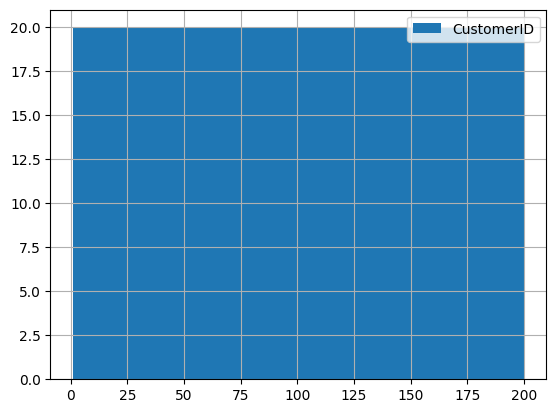

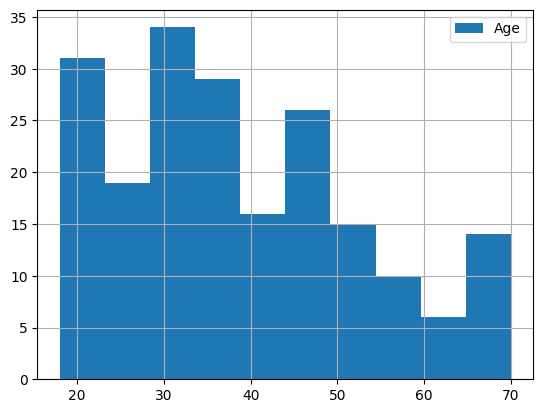

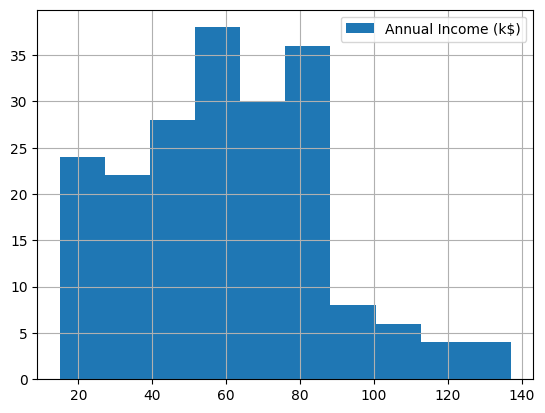

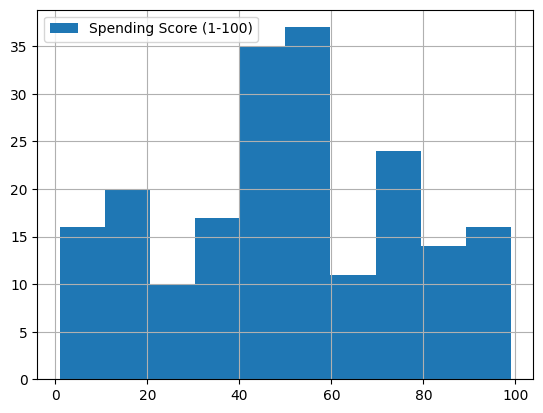

In [4]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].hist()
    legend = plt.legend([col])
    plt.show()

Распределение условно можно считать нормальным. Колока ID не в счет

In [5]:
df.drop('CustomerID', axis=1, inplace=True)

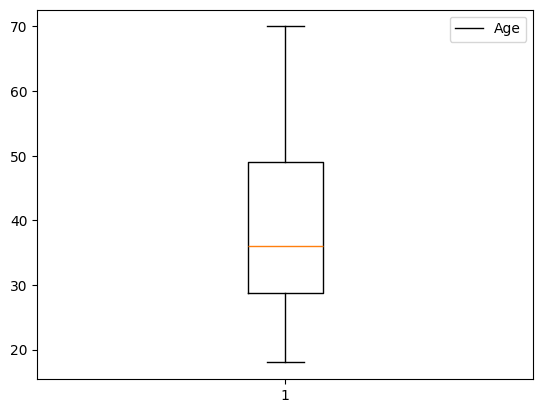

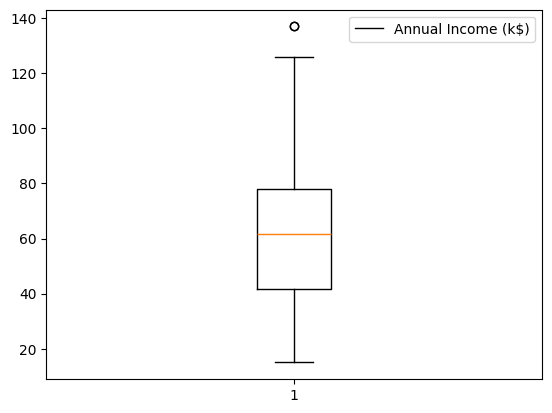

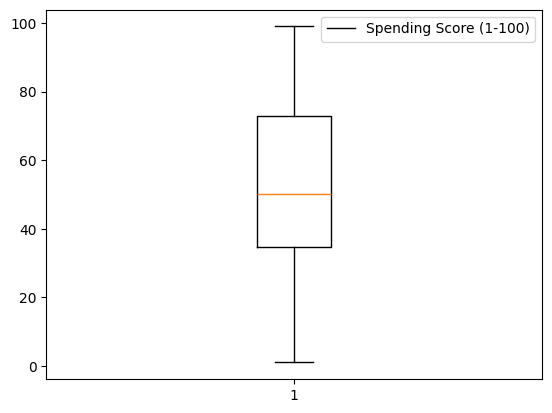

In [6]:
for col in df.select_dtypes(include=['number']).columns:
    plt.boxplot(df[col])
    legend = plt.legend([col])
    plt.show()

Незначительный выброс наблюдаем в данных по годовому доходу.<br>
Проигнорируем его <br>
Посмотрим на категориальные данные

In [7]:
df.Genre.value_counts()

,count
Genre,
Female,112
Male,88


Пропусков нет, данные имеют близкое значение классов.
Применим LabelEncoder

In [8]:
encoder = LabelEncoder()
df.Genre = encoder.fit_transform(df.Genre)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

Я не очень понимаю, как, глядя на данные и не имея представления о цели кластеризации, можно определить число узлов. <br>
Интуитивно можно предположить 3 или 4 - поскольку меньше 3-х - вероятно, будет неинформативно, больше 7-8 - возможно, будет слишком детализировано.<br><br>
Мне понравилась идея с методом локтя

In [9]:
k_values = range(2, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

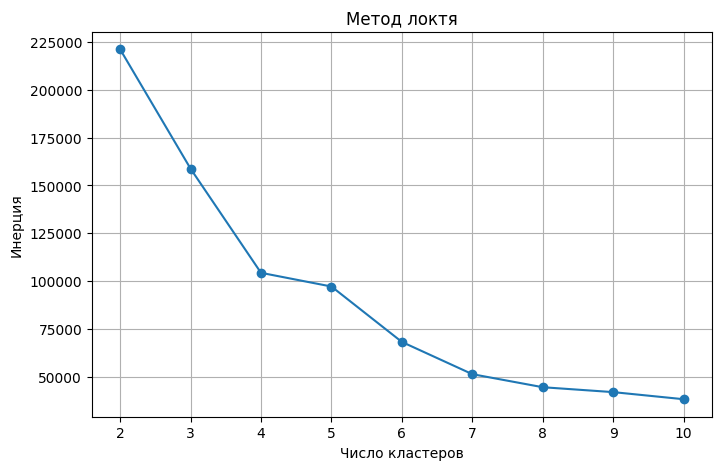

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.xticks(k_values)
plt.grid()
plt.show()

Из графика видно, что 4 - оптимальное числом кластеров

### Задание 3

Преобразуйте категориальный признак Genre в численный.

In [11]:
# Это уже сделано на этапе EDA

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [12]:
# Сделано выше

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [14]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


In [15]:
cluster_sizes = df['Cluster'].value_counts()
print("Размер кластеров:")
print(cluster_sizes)


Размер кластеров:
Cluster
0    95
1    39
3    38
2    28
Name: count, dtype: int64


In [16]:
cluster_analysis = df.groupby('Cluster').mean()
print("Анализ кластеров:")
print(cluster_analysis)

Анализ кластеров:
            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.378947  44.894737           48.705263               42.631579
1        0.461538  32.692308           86.538462               82.128205
2        0.500000  24.821429           28.714286               74.250000
3        0.526316  40.394737           87.000000               18.631579


# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [17]:
df2 = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/6057168/attachment/b7b57ffc092c4462e768fe4168b85e42.csv')
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [20]:
df2.isna().sum()/df2.shape[0]

,0
AT,0.0
AP,0.0
AH,0.0
AFDP,0.0
GTEP,0.0
TIT,0.0
TAT,0.0
TEY,0.0
CDP,0.0
CO,0.0


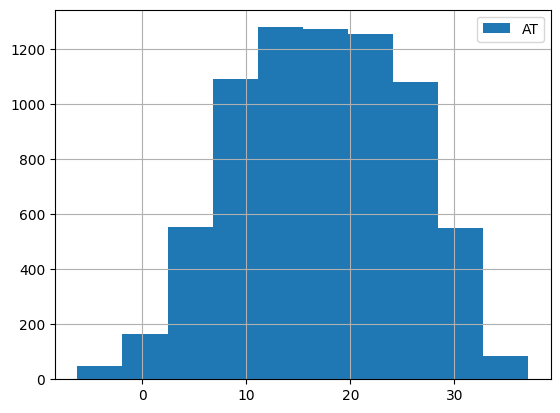

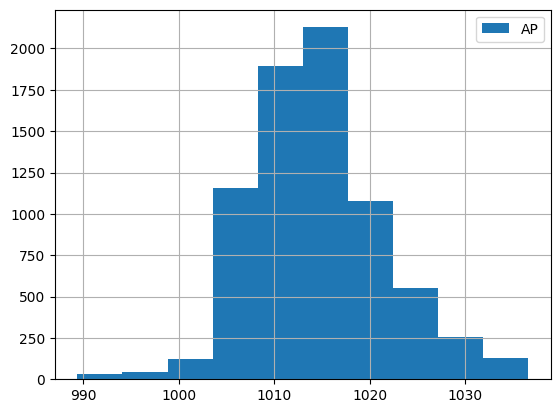

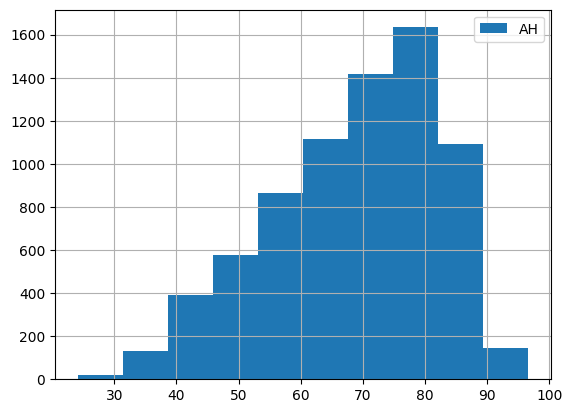

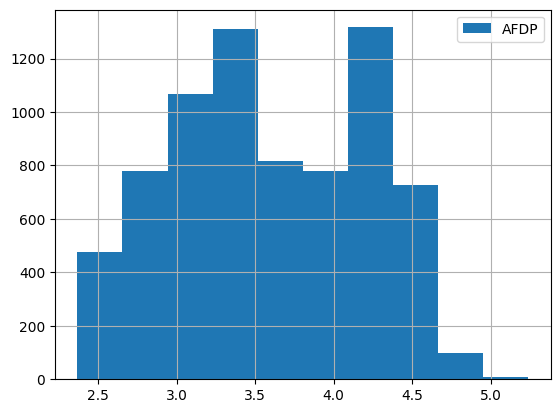

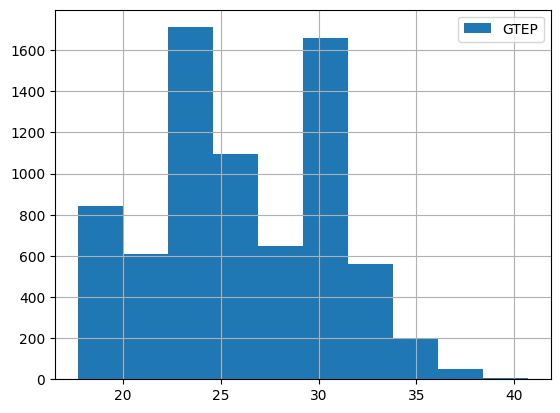

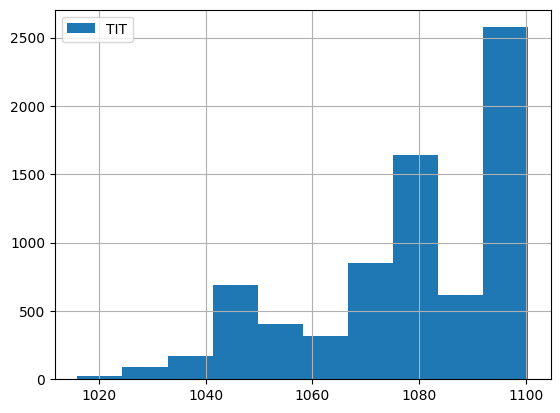

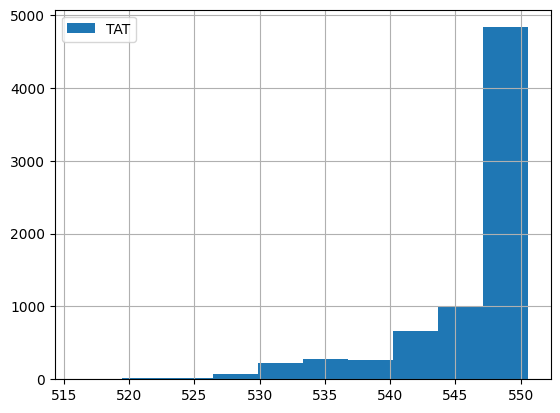

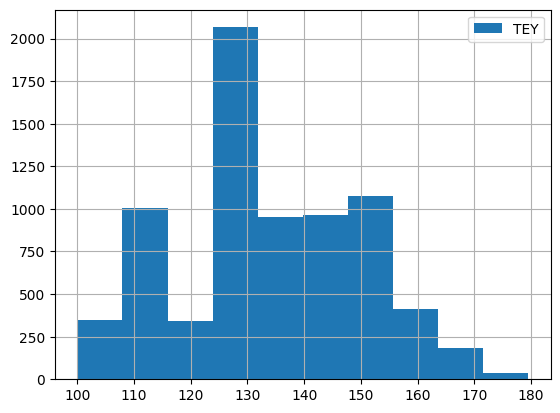

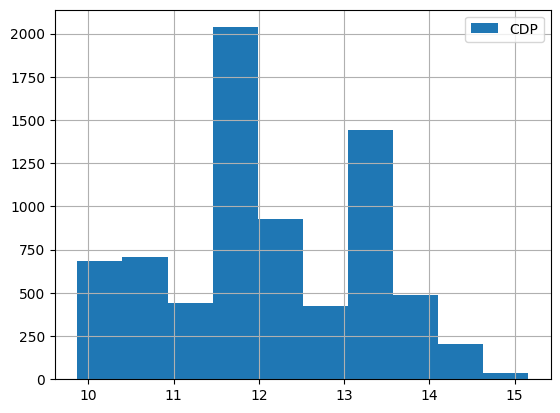

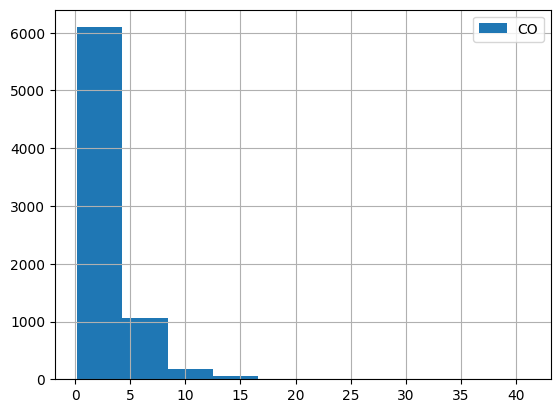

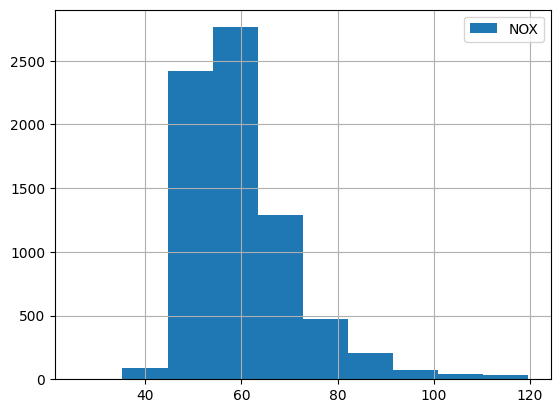

In [21]:
for col in df2.select_dtypes(include=['number']).columns:
    df2[col].hist()
    legend = plt.legend([col])
    plt.show()

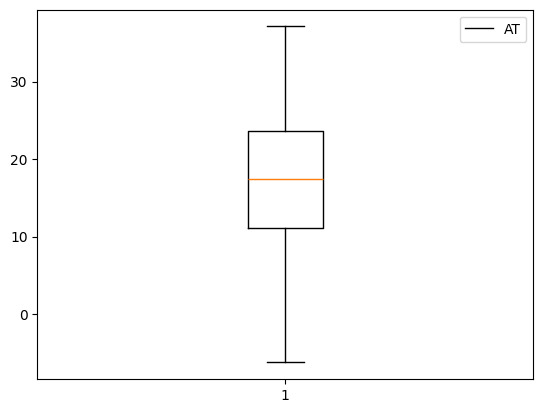

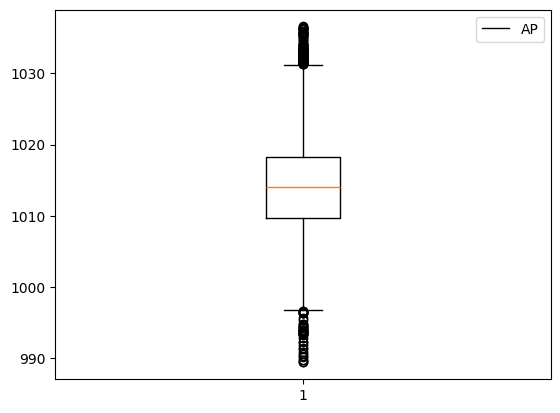

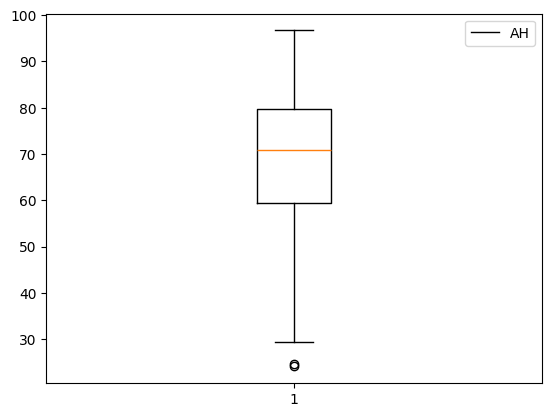

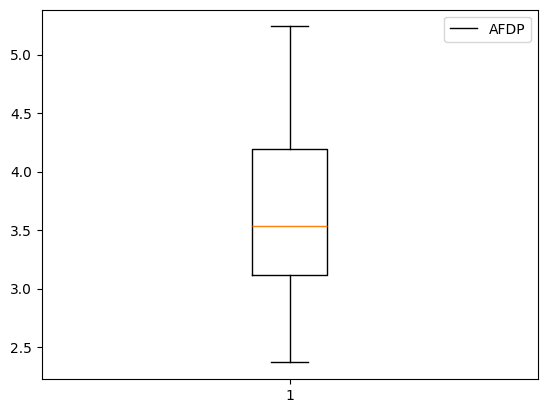

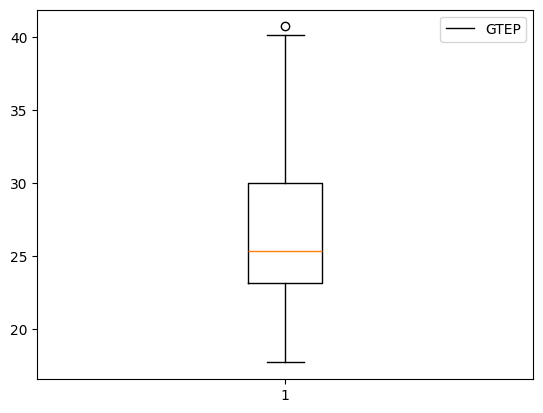

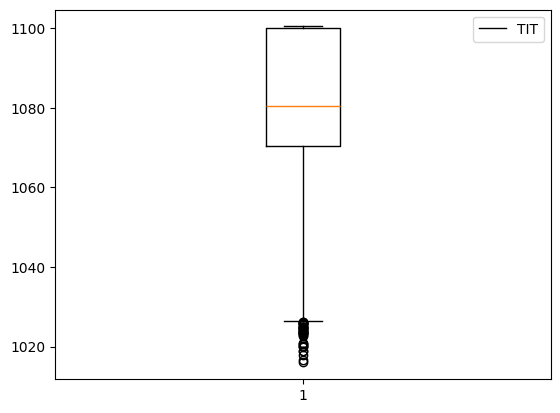

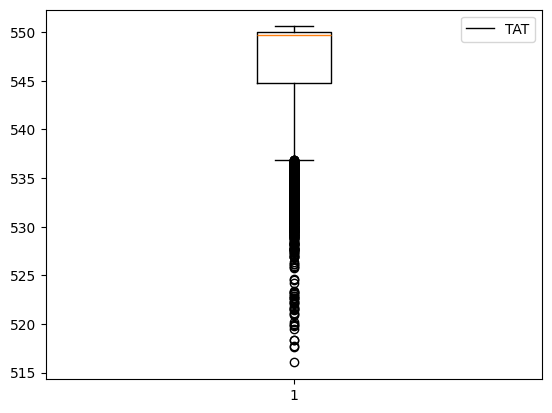

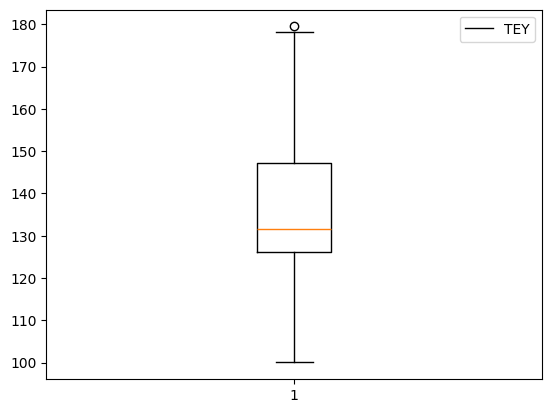

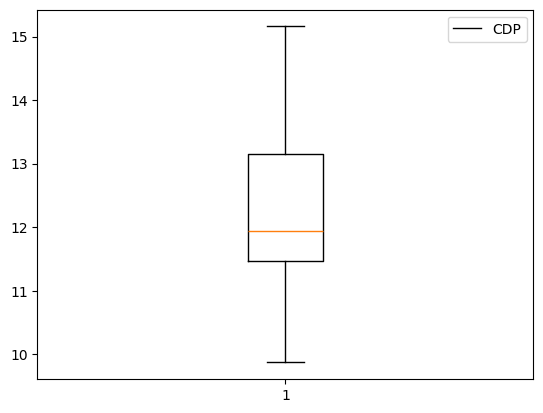

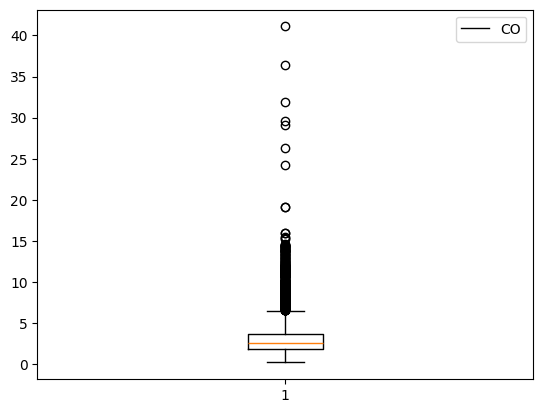

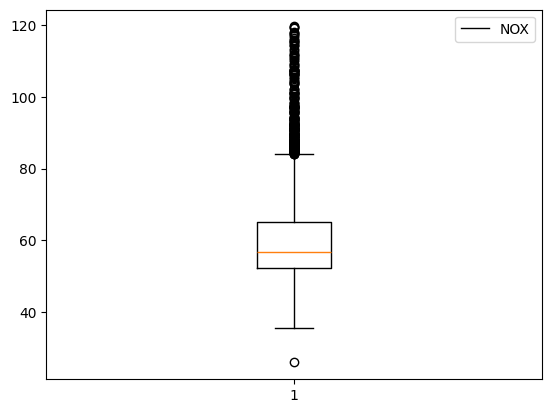

In [22]:
for col in df2.select_dtypes(include=['number']).columns:
    plt.boxplot(df2[col])
    legend = plt.legend([col])
    plt.show()

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

In [99]:
# Я так не понял, как это можно сделать. Возможно, я бы смог, имея хоть какое-то представление - что эти параметры означают.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

In [35]:
def evaluate_dbscan(eps, min_samples, data):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data)

    if len(set(labels)) <= 1:
        return -1

    return silhouette_score(data, labels)

In [51]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [56]:
param_grid = {
    'eps': np.arange(2, 4, 0.1),
    'min_samples': range(1, 10, 1)
}

In [57]:
best_params = None
best_score = -1

In [58]:
for params in ParameterGrid(param_grid):
    eps = params['eps']
    min_samples = params['min_samples']
    score = evaluate_dbscan(eps, min_samples, df_scaled)

    if score > best_score:
        best_score = score
        best_params = params

print(f"Лучшие параметры: {best_params}")
print(f"Лучший silhouette_score: {best_score}")

Лучшие параметры: {'eps': 3.6000000000000014, 'min_samples': 3}
Лучший silhouette_score: 0.6715035300574999


In [59]:
model = DBSCAN(eps=3.6, min_samples=3)
df2['Cluster'] = model.fit_predict(df2)
df2.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Cluster
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250,-1
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020,-1
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147,-1
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078,-1
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515,0


In [60]:
df2.Cluster.value_counts()

,count
Cluster,
-1,2211
164,1392
32,1069
145,268
157,153
...,...
162,3
161,3
163,3


Получили 292 кластера. 2211 записей классифицировано, как выброс

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.

silhouette_score > 0.5 считается хорошим.<br>
В результате кластеризации мы получили размеченный датасет, к которому можно применить метод классификации и оценить вклад каждого из параметров

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

filtered_data = df2.query('Cluster != -1')

X = filtered_data.drop(columns=['Cluster'])
y = filtered_data['Cluster']

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Средняя точность RandomForestClassifier на кросс-валидации:", cv_scores.mean())



feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Важность признаков:")
print(feature_importance)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Средняя точность RandomForestClassifier на кросс-валидации: 0.8892273334641512
Важность признаков:
AFDP    0.139645
TEY     0.110742
CDP     0.105521
NOX     0.103201
AP      0.099546
GTEP    0.098533
AT      0.095637
AH      0.079696
TIT     0.077383
TAT     0.047070
CO      0.043026
dtype: float64


Точность на кросс-валидации -почти 90%, поэтому модели можно доверять.<br>
Самыми важными признаками явились <br>
AFDP — Давление выпуска воздушного потока (Air Flow Discharge Pressure)<br>
TEY — Энергетическая отдача турбины (Turbine Energy Yield)<br>
CDP — Давление на выходе компрессора (Compressor Discharge Pressure)<br>
NOX — Оксиды азота (Nitrogen Oxides)<br>
<br>
Понять смысл этого я не могу, поскольну не профессионал в данной области.